In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

### here we created two dataframes for the period before COVID and after COVID happend

In [4]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [191102, 191109, 191116,191123,191130,191207,191214,191221,191228]
turnstiles_df_before = get_data(week_nums)

In [5]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [201107,201114,201121,201128,201205,201212,201219,201226]
turnstiles_df_after = get_data(week_nums)

In [6]:
turnstiles_df_before.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679


In [7]:
turnstiles_df_after.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,00:00:00,REGULAR,7481098,2545767
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,04:00:00,REGULAR,7481103,2545767
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,08:00:00,REGULAR,7481117,2545786
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,12:00:00,REGULAR,7481158,2545831
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,16:00:00,REGULAR,7481285,2545868


In [8]:
turnstiles_df_before.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
turnstiles_df_after.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
turnstiles_df_before.columns = [column.strip() for column in turnstiles_df_before.columns]
turnstiles_df_before.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
turnstiles_df_after.columns = [column.strip() for column in turnstiles_df_after.columns]
turnstiles_df_after.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
turnstiles_df_before.DATE.value_counts().sort_index()

10/26/2019    29229
10/27/2019    29338
10/28/2019    29426
10/29/2019    29832
10/30/2019    29319
              ...  
12/23/2019    29709
12/24/2019    29954
12/25/2019    29471
12/26/2019    29466
12/27/2019    29423
Name: DATE, Length: 63, dtype: int64

In [13]:
turnstiles_df_after.DATE.value_counts().sort_index()

10/31/2020    31374
11/01/2020    32395
11/02/2020    30058
11/03/2020    29752
11/04/2020    29765
11/05/2020    29682
11/06/2020    30079
11/07/2020    30139
11/08/2020    29720
11/09/2020    29631
11/10/2020    29695
11/11/2020    29765
11/12/2020    29674
11/13/2020    30152
11/14/2020    29904
11/15/2020    29965
11/16/2020    30070
11/17/2020    30071
11/18/2020    29881
11/19/2020    29999
11/20/2020    30367
11/21/2020    29807
11/22/2020    29741
11/23/2020    30736
11/24/2020    29708
11/25/2020    29695
11/26/2020    29826
11/27/2020    30265
11/28/2020    30061
11/29/2020    30289
11/30/2020    29723
12/01/2020    29762
12/02/2020    29975
12/03/2020    29820
12/04/2020    30150
12/05/2020    30286
12/06/2020    29950
12/07/2020    30147
12/08/2020    29947
12/09/2020    29973
12/10/2020    29940
12/11/2020    30160
12/12/2020    30557
12/13/2020    30067
12/14/2020    29942
12/15/2020    29784
12/16/2020    29824
12/17/2020    29729
12/18/2020    31019
12/19/2020    31271


In [14]:
turnstiles_df_before.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [15]:
turnstiles_df_after.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

### the shape of each dataframe we created

In [16]:
turnstiles_df_before.shape

(1855144, 11)

In [17]:
turnstiles_df_after.shape

(1685320, 11)

In [18]:
turnstiles_df_before["DATE_TIME"] = pd.to_datetime(turnstiles_df_before.DATE + " " + turnstiles_df_before.TIME, 
                                                   format="%m/%d/%Y %H:%M:%S")

In [19]:
turnstiles_df_after["DATE_TIME"] = pd.to_datetime(turnstiles_df_after.DATE + " " + turnstiles_df_after.TIME,
                                                  format="%m/%d/%Y %H:%M:%S")

In [20]:
turnstiles_df_before['DATE_TIME'].dtypes

dtype('<M8[ns]')

In [21]:
turnstiles_df_after['DATE_TIME'].dtypes

dtype('<M8[ns]')

In [22]:
turnstiles_df_before.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491,2019-10-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00


In [23]:
turnstiles_df_after.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,00:00:00,REGULAR,7481098,2545767,2020-10-31 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,04:00:00,REGULAR,7481103,2545767,2020-10-31 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,08:00:00,REGULAR,7481117,2545786,2020-10-31 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,12:00:00,REGULAR,7481158,2545831,2020-10-31 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/31/2020,16:00:00,REGULAR,7481285,2545868,2020-10-31 16:00:00


### to see if there is duplicates and then remove them

In [24]:
(turnstiles_df_before
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1447786,R240,R047,00-03-04,GRD CNTRL-42 ST,2019-11-26 16:00:00,2
1668542,R514,R094,00-05-00,ASTORIA BLVD,2019-12-16 15:00:00,2
1522420,R285,R308,00-00-00,MT EDEN AV,2019-11-03 03:00:00,2
1522421,R285,R308,00-00-00,MT EDEN AV,2019-11-03 07:00:00,2
1522422,R285,R308,00-00-00,MT EDEN AV,2019-11-03 11:00:00,2
1522423,R285,R308,00-00-00,MT EDEN AV,2019-11-03 15:00:00,2
1522424,R285,R308,00-00-00,MT EDEN AV,2019-11-03 19:00:00,2
1522425,R285,R308,00-00-00,MT EDEN AV,2019-11-03 23:00:00,2
1522426,R285,R308,00-00-00,MT EDEN AV,2019-11-04 03:00:00,2
1522418,R285,R308,00-00-00,MT EDEN AV,2019-11-02 20:00:00,2


In [25]:
(turnstiles_df_after
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=True)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-10-31 00:00:00,1
1123550,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 17:00:00,1
1123549,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 13:00:00,1
1123548,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 09:00:00,1
1123547,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 05:00:00,1
1123546,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 01:00:00,1
1123545,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 21:00:00,1
1123544,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 17:00:00,1
1123543,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 13:00:00,1
1123542,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 09:00:00,1


In [26]:
mask = ((turnstiles_df_before["C/A"] == "N045") & 
(turnstiles_df_before["UNIT"] == "R187") & 
(turnstiles_df_before["SCP"] == "01-00-00") & 
(turnstiles_df_before["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df_before["DATE_TIME"].dt.date == datetime.datetime(2019, 11, 16).date()))
turnstiles_df_before[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
49252,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/16/2019,00:00:00,REGULAR,5424377,6877621,2019-11-16 00:00:00
49253,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/16/2019,04:00:00,REGULAR,5424380,6877628,2019-11-16 04:00:00
49254,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/16/2019,08:00:00,REGULAR,5424393,6877652,2019-11-16 08:00:00
49255,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/16/2019,12:00:00,RECOVR AUD,5424457,6877972,2019-11-16 12:00:00
49256,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/16/2019,16:00:00,RECOVR AUD,5424845,6878377,2019-11-16 16:00:00
49257,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/16/2019,20:00:00,REGULAR,5425306,6878518,2019-11-16 20:00:00


In [27]:
mask = ((turnstiles_df_after["C/A"] == "N045") & 
(turnstiles_df_after["UNIT"] == "R187") & 
(turnstiles_df_after["SCP"] == "01-00-00") & 
(turnstiles_df_after["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df_after["DATE_TIME"].dt.date == datetime.datetime(2020, 11, 28).date()))
turnstiles_df_after[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
51617,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,00:00:00,REGULAR,5551220,7057462,2020-11-28 00:00:00
51618,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,04:00:00,REGULAR,5551221,7057466,2020-11-28 04:00:00
51619,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,08:00:00,REGULAR,5551221,7057480,2020-11-28 08:00:00
51620,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,12:00:00,REGULAR,5551227,7057594,2020-11-28 12:00:00
51621,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,16:00:00,REGULAR,5551278,7057782,2020-11-28 16:00:00
51622,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,11/28/2020,20:00:00,REGULAR,5551337,7057838,2020-11-28 20:00:00


In [28]:
turnstiles_df_before.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df_before.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [29]:
turnstiles_df_after.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df_after.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [30]:
(turnstiles_df_before
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-10-26 00:00:00,1
1236703,R138,R293,00-02-03,34 ST-PENN STA,2019-10-29 06:00:00,1
1236729,R138,R293,00-02-03,34 ST-PENN STA,2019-11-02 14:00:00,1
1236728,R138,R293,00-02-03,34 ST-PENN STA,2019-11-02 10:00:00,1
1236727,R138,R293,00-02-03,34 ST-PENN STA,2019-11-02 06:00:00,1


In [31]:
(turnstiles_df_after
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-10-31 00:00:00,1
1123541,R138,R293,00-02-03,34 ST-PENN STA,2020-11-06 05:00:00,1
1123551,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 21:00:00,1
1123550,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 17:00:00,1
1123549,R138,R293,00-02-03,34 ST-PENN STA,2020-11-07 13:00:00,1


In [32]:
turnstiles_df_before.DESC.value_counts()

REGULAR       1847335
RECOVR AUD       7748
Name: DESC, dtype: int64

In [33]:
turnstiles_df_after.DESC.value_counts()

REGULAR       1679214
RECOVR AUD       6102
Name: DESC, dtype: int64

In [34]:
turnstiles_df_before

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
206706,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,20:00:00,REGULAR,5554,420,2019-12-27 20:00:00
206705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,REGULAR,5554,420,2019-12-27 16:00:00
206704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,REGULAR,5554,420,2019-12-27 12:00:00
206703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,REGULAR,5554,420,2019-12-27 08:00:00
206702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,REGULAR,5554,420,2019-12-27 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00


In [35]:
turnstiles_df_before

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
206706,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,20:00:00,REGULAR,5554,420,2019-12-27 20:00:00
206705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,REGULAR,5554,420,2019-12-27 16:00:00
206704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,REGULAR,5554,420,2019-12-27 12:00:00
206703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,REGULAR,5554,420,2019-12-27 08:00:00
206702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,REGULAR,5554,420,2019-12-27 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00


In [36]:
turnstiles_daily_before = (turnstiles_df_before
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [37]:
turnstiles_daily_before.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,10/26/2019,7248159
1,A002,R051,02-00-00,59 ST,10/27/2019,7248774
2,A002,R051,02-00-00,59 ST,10/28/2019,7250210
3,A002,R051,02-00-00,59 ST,10/29/2019,7251677
4,A002,R051,02-00-00,59 ST,10/30/2019,7253148


In [38]:
turnstiles_daily_after = (turnstiles_df_after
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [39]:
turnstiles_daily_after.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,10/31/2020,7481453
1,A002,R051,02-00-00,59 ST,11/01/2020,7481759
2,A002,R051,02-00-00,59 ST,11/02/2020,7482353
3,A002,R051,02-00-00,59 ST,11/03/2020,7482836
4,A002,R051,02-00-00,59 ST,11/04/2020,7483381


In [40]:
turnstiles_daily_before[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_before
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-40-2f1a48a033fd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_before[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_before


In [41]:
turnstiles_daily_before.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,10/26/2019,7248159,NaN,NaN
1,A002,R051,02-00-00,59 ST,10/27/2019,7248774,10/26/2019,7248159.0
2,A002,R051,02-00-00,59 ST,10/28/2019,7250210,10/27/2019,7248774.0
3,A002,R051,02-00-00,59 ST,10/29/2019,7251677,10/28/2019,7250210.0
4,A002,R051,02-00-00,59 ST,10/30/2019,7253148,10/29/2019,7251677.0


In [42]:
turnstiles_daily_before.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
308328,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/23/2019,5554,12/22/2019,5554.0
308329,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/24/2019,5554,12/23/2019,5554.0
308330,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2019,5554,12/24/2019,5554.0
308331,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/26/2019,5554,12/25/2019,5554.0
308332,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,5554,12/26/2019,5554.0


In [43]:
turnstiles_daily_after[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_after
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-43-314c7fb90a8c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_after[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_after


In [44]:
turnstiles_daily_after.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,10/31/2020,7481453,NaN,NaN
1,A002,R051,02-00-00,59 ST,11/01/2020,7481759,10/31/2020,7481453.0
2,A002,R051,02-00-00,59 ST,11/02/2020,7482353,11/01/2020,7481759.0
3,A002,R051,02-00-00,59 ST,11/03/2020,7482836,11/02/2020,7482353.0
4,A002,R051,02-00-00,59 ST,11/04/2020,7483381,11/03/2020,7482836.0


In [45]:
turnstiles_daily_after.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
278783,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/21/2020,5554,12/20/2020,5554.0
278784,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/22/2020,5554,12/21/2020,5554.0
278785,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/23/2020,5554,12/22/2020,5554.0
278786,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/24/2020,5554,12/23/2020,5554.0
278787,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,5554,12/24/2020,5554.0


In [46]:
turnstiles_daily_before.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [47]:
turnstiles_daily_before.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,10/27/2019,7248774,10/26/2019,7248159.0
2,A002,R051,02-00-00,59 ST,10/28/2019,7250210,10/27/2019,7248774.0
3,A002,R051,02-00-00,59 ST,10/29/2019,7251677,10/28/2019,7250210.0
4,A002,R051,02-00-00,59 ST,10/30/2019,7253148,10/29/2019,7251677.0
5,A002,R051,02-00-00,59 ST,10/31/2019,7254605,10/30/2019,7253148.0


In [48]:
turnstiles_daily_after.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [49]:
turnstiles_daily_after.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,11/01/2020,7481759,10/31/2020,7481453.0
2,A002,R051,02-00-00,59 ST,11/02/2020,7482353,11/01/2020,7481759.0
3,A002,R051,02-00-00,59 ST,11/03/2020,7482836,11/02/2020,7482353.0
4,A002,R051,02-00-00,59 ST,11/04/2020,7483381,11/03/2020,7482836.0
5,A002,R051,02-00-00,59 ST,11/05/2020,7484039,11/04/2020,7483381.0


In [50]:
positive_entries_mask_before = turnstiles_daily_before["ENTRIES"] > turnstiles_daily_before["PREV_ENTRIES"]
positive_entries_mask_before

1          True
2          True
3          True
4          True
5          True
          ...  
308328    False
308329    False
308330    False
308331    False
308332    False
Length: 303392, dtype: bool

In [51]:
positive_entries_mask_after = turnstiles_daily_after["ENTRIES"] > turnstiles_daily_after["PREV_ENTRIES"]
positive_entries_mask_before

1          True
2          True
3          True
4          True
5          True
          ...  
308328    False
308329    False
308330    False
308331    False
308332    False
Length: 303392, dtype: bool

In [52]:
turnstiles_daily_before = turnstiles_daily_before[positive_entries_mask_before]
turnstiles_daily_before

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,10/27/2019,7248774,10/26/2019,7248159.0
2,A002,R051,02-00-00,59 ST,10/28/2019,7250210,10/27/2019,7248774.0
3,A002,R051,02-00-00,59 ST,10/29/2019,7251677,10/28/2019,7250210.0
4,A002,R051,02-00-00,59 ST,10/30/2019,7253148,10/29/2019,7251677.0
5,A002,R051,02-00-00,59 ST,10/31/2019,7254605,10/30/2019,7253148.0
...,...,...,...,...,...,...,...,...
308255,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/13/2019,3032,12/12/2019,3031.0
308256,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/14/2019,3033,12/13/2019,3032.0
308258,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/16/2019,3034,12/15/2019,3033.0
308266,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/24/2019,3035,12/23/2019,3034.0


In [53]:
turnstiles_daily_after = turnstiles_daily_after[positive_entries_mask_after]
turnstiles_daily_after

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,11/01/2020,7481759,10/31/2020,7481453.0
2,A002,R051,02-00-00,59 ST,11/02/2020,7482353,11/01/2020,7481759.0
3,A002,R051,02-00-00,59 ST,11/03/2020,7482836,11/02/2020,7482353.0
4,A002,R051,02-00-00,59 ST,11/04/2020,7483381,11/03/2020,7482836.0
5,A002,R051,02-00-00,59 ST,11/05/2020,7484039,11/04/2020,7483381.0
...,...,...,...,...,...,...,...,...
278721,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/15/2020,3185,12/14/2020,3184.0
278724,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/18/2020,3186,12/17/2020,3185.0
278727,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/21/2020,3187,12/20/2020,3186.0
278728,TRAM2,R469,00-05-00,RIT-ROOSEVELT,12/22/2020,3189,12/21/2020,3187.0


In [54]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_before["DAILY_ENTRIES"] = turnstiles_daily_before.apply(get_daily_counts, axis=1, max_counter=100000)

458753 197611.0
458753 0.0
983284 27934.0
4982302 877264.0
67120006 292100.0
67122955 103584.0
36579514 339421.0
525219 2487.0
31260681 48404.0
589824 458752.0
393317 96322.0
589824 1395.0
15753262 3953152.0
9129981 8847125.0
39242377 15747786.0
131072 12.0
458752 0.0
5198042 1005308.0
352351910 1425732.0
1761654991 6920518.0
16804473 84424.0
1761654061 6924162.0
1560341960 6151899.0
2046772953 8817079.0
1359520865 139532008.0
917510 1920.0


In [55]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_after["DAILY_ENTRIES"] = turnstiles_daily_after.apply(get_daily_counts, axis=1, max_counter=100000)

393278 32986.0
524288 267179.0
589976 328913.0
262428 126988.0
2563619 2301353.0
721042 343.0
327685 1434.0
955056270 4994242.0
720906 80171.0
327680 0.0
524951 64642.0
524288 41929.0
589824 33256.0


In [56]:
ca_unit_station_daily_before = turnstiles_daily_before.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily_before

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,10/27/2019,6603.0
1,A002,R051,59 ST,10/28/2019,12430.0
2,A002,R051,59 ST,10/29/2019,13185.0
3,A002,R051,59 ST,10/30/2019,13504.0
4,A002,R051,59 ST,10/31/2019,12810.0
...,...,...,...,...,...
45617,TRAM2,R469,RIT-ROOSEVELT,12/23/2019,3058.0
45618,TRAM2,R469,RIT-ROOSEVELT,12/24/2019,2883.0
45619,TRAM2,R469,RIT-ROOSEVELT,12/25/2019,3254.0
45620,TRAM2,R469,RIT-ROOSEVELT,12/26/2019,3215.0


In [57]:
ca_unit_station_daily_after = turnstiles_daily_after.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily_after

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,11/01/2020,2401.0
1,A002,R051,59 ST,11/02/2020,4747.0
2,A002,R051,59 ST,11/03/2020,4441.0
3,A002,R051,59 ST,11/04/2020,4593.0
4,A002,R051,59 ST,11/05/2020,4782.0
...,...,...,...,...,...
40310,TRAM2,R469,RIT-ROOSEVELT,12/21/2020,1189.0
40311,TRAM2,R469,RIT-ROOSEVELT,12/22/2020,1159.0
40312,TRAM2,R469,RIT-ROOSEVELT,12/23/2020,1688.0
40313,TRAM2,R469,RIT-ROOSEVELT,12/24/2020,1020.0


In [58]:
station_daily_before = turnstiles_daily_before.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_before

,STATION,DATE,DAILY_ENTRIES
0,1 AV,10/27/2019,5902.0
1,1 AV,10/28/2019,16886.0
2,1 AV,10/29/2019,18475.0
3,1 AV,10/30/2019,19148.0
4,1 AV,10/31/2019,19331.0
...,...,...,...
23290,ZEREGA AV,12/23/2019,2386.0
23291,ZEREGA AV,12/24/2019,1884.0
23292,ZEREGA AV,12/25/2019,801.0
23293,ZEREGA AV,12/26/2019,2029.0


In [59]:
station_daily_after = turnstiles_daily_after.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_after

,STATION,DATE,DAILY_ENTRIES
0,1 AV,11/01/2020,4990.0
1,1 AV,11/02/2020,6816.0
2,1 AV,11/03/2020,6163.0
3,1 AV,11/04/2020,6429.0
4,1 AV,11/05/2020,7045.0
...,...,...,...
20657,ZEREGA AV,12/21/2020,966.0
20658,ZEREGA AV,12/22/2020,1051.0
20659,ZEREGA AV,12/23/2020,1082.0
20660,ZEREGA AV,12/24/2020,753.0


In [60]:
station_totals_before = station_daily_before.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_before.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,8991432.0
1,GRD CNTRL-42 ST,7267237.0
2,34 ST-HERALD SQ,6578211.0
3,23 ST,6227711.0
4,14 ST-UNION SQ,5464327.0


In [61]:
station_totals_after = station_daily_after.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_after.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,1531478.0
1,34 ST-HERALD SQ,1392055.0
2,86 ST,1245264.0
3,125 ST,1176360.0
4,GRD CNTRL-42 ST,1098066.0


Text(0.5, 1.0, ' total Daily Entries for top 10 busiest stations before covid and after covid')

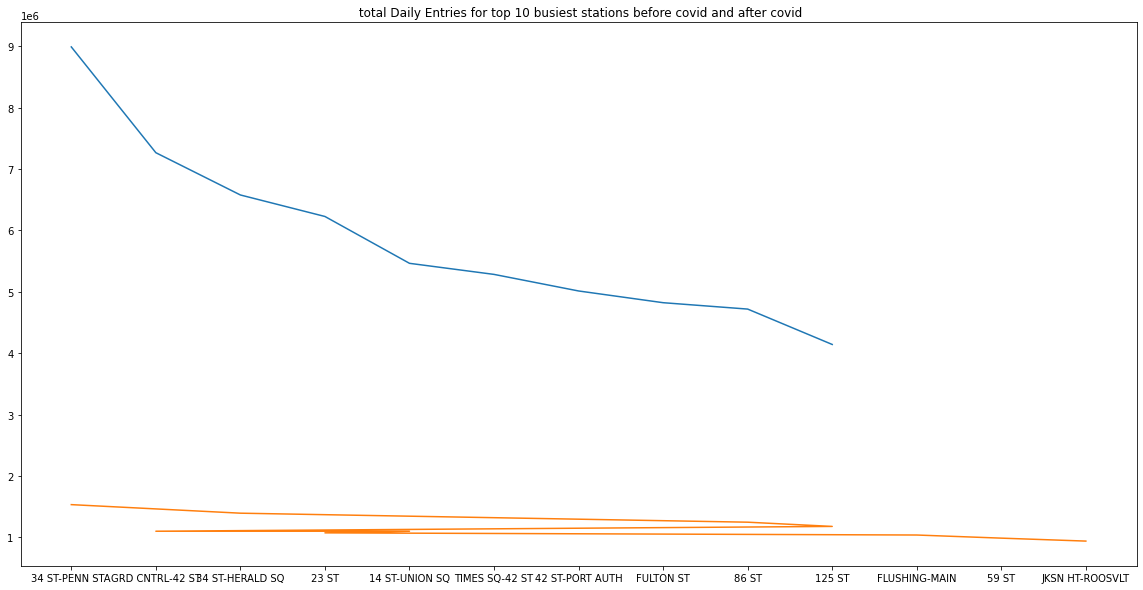

In [62]:
plt.figure(figsize=(20,10))
plt.plot(station_totals_before.iloc[0:10]['STATION'],station_totals_before.iloc[0:10]['DAILY_ENTRIES'],)
plt.plot(station_totals_after.iloc[0:10]['STATION'],station_totals_after.iloc[0:10]['DAILY_ENTRIES'])
plt.title(' total Daily Entries for top 10 busiest stations before covid and after covid')

### the total daily EXITS for 10 busiest stations before covid and after covid

In [63]:
turnstiles_daily_before = (turnstiles_df_before
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())

In [64]:
turnstiles_daily_before.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,10/26/2019,2455733
1,A002,R051,02-00-00,59 ST,10/27/2019,2455980
2,A002,R051,02-00-00,59 ST,10/28/2019,2456513
3,A002,R051,02-00-00,59 ST,10/29/2019,2457081
4,A002,R051,02-00-00,59 ST,10/30/2019,2457649


In [107]:
turnstiles_daily_after = (turnstiles_df_after
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())

In [108]:
turnstiles_daily_after.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,10/31/2020,2545895
1,A002,R051,02-00-00,59 ST,11/01/2020,2546006
2,A002,R051,02-00-00,59 ST,11/02/2020,2546264
3,A002,R051,02-00-00,59 ST,11/03/2020,2546501
4,A002,R051,02-00-00,59 ST,11/04/2020,2546745


In [109]:
turnstiles_daily_before[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_before
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-109-7fd8b6a6483a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_before[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_before


In [110]:
turnstiles_daily_before.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,10/27/2019,2455980,NaN,NaN,247.0
2,A002,R051,02-00-00,59 ST,10/28/2019,2456513,10/27/2019,2455980.0,533.0
3,A002,R051,02-00-00,59 ST,10/29/2019,2457081,10/28/2019,2456513.0,568.0
4,A002,R051,02-00-00,59 ST,10/30/2019,2457649,10/29/2019,2457081.0,568.0
5,A002,R051,02-00-00,59 ST,10/31/2019,2458157,10/30/2019,2457649.0,508.0


In [111]:
turnstiles_daily_before.tail()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
308202,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/23/2019,395004,12/22/2019,394995.0,9.0
308203,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/24/2019,395020,12/23/2019,395004.0,16.0
308204,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/25/2019,395036,12/24/2019,395020.0,16.0
308205,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/26/2019,395059,12/25/2019,395036.0,23.0
308206,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/27/2019,395078,12/26/2019,395059.0,19.0


In [112]:
turnstiles_daily_after[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_after
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

<ipython-input-112-fa27782bf48e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_after[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_after


In [113]:
turnstiles_daily_after.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,10/31/2020,2545895,NaN,NaN
1,A002,R051,02-00-00,59 ST,11/01/2020,2546006,10/31/2020,2545895.0
2,A002,R051,02-00-00,59 ST,11/02/2020,2546264,11/01/2020,2546006.0
3,A002,R051,02-00-00,59 ST,11/03/2020,2546501,11/02/2020,2546264.0
4,A002,R051,02-00-00,59 ST,11/04/2020,2546745,11/03/2020,2546501.0


In [114]:
turnstiles_daily_after.tail()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
278783,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/21/2020,541,12/20/2020,541.0
278784,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/22/2020,541,12/21/2020,541.0
278785,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/23/2020,541,12/22/2020,541.0
278786,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/24/2020,541,12/23/2020,541.0
278787,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2020,541,12/24/2020,541.0


In [115]:
turnstiles_daily_before.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [116]:
turnstiles_daily_before.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
2,A002,R051,02-00-00,59 ST,10/28/2019,2456513,10/27/2019,2455980.0,533.0
3,A002,R051,02-00-00,59 ST,10/29/2019,2457081,10/28/2019,2456513.0,568.0
4,A002,R051,02-00-00,59 ST,10/30/2019,2457649,10/29/2019,2457081.0,568.0
5,A002,R051,02-00-00,59 ST,10/31/2019,2458157,10/30/2019,2457649.0,508.0
6,A002,R051,02-00-00,59 ST,11/01/2019,2458688,10/31/2019,2458157.0,531.0


In [117]:
turnstiles_daily_after.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [118]:
turnstiles_daily_after.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,11/01/2020,2546006,10/31/2020,2545895.0
2,A002,R051,02-00-00,59 ST,11/02/2020,2546264,11/01/2020,2546006.0
3,A002,R051,02-00-00,59 ST,11/03/2020,2546501,11/02/2020,2546264.0
4,A002,R051,02-00-00,59 ST,11/04/2020,2546745,11/03/2020,2546501.0
5,A002,R051,02-00-00,59 ST,11/05/2020,2547022,11/04/2020,2546745.0


In [119]:
positive_exits_mask_before = turnstiles_daily_before["EXITS"] > turnstiles_daily_before["PREV_EXITS"]
positive_exits_mask_before

2         True
3         True
4         True
5         True
6         True
          ... 
308202    True
308203    True
308204    True
308205    True
308206    True
Length: 263083, dtype: bool

In [120]:
positive_exits_mask_after = turnstiles_daily_after["EXITS"] > turnstiles_daily_after["PREV_EXITS"]
positive_exits_mask_after

1          True
2          True
3          True
4          True
5          True
          ...  
278783    False
278784    False
278785    False
278786    False
278787    False
Length: 273778, dtype: bool

In [121]:
turnstiles_daily_before = turnstiles_daily_before[positive_exits_mask_before]
turnstiles_daily_before

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
2,A002,R051,02-00-00,59 ST,10/28/2019,2456513,10/27/2019,2455980.0,533.0
3,A002,R051,02-00-00,59 ST,10/29/2019,2457081,10/28/2019,2456513.0,568.0
4,A002,R051,02-00-00,59 ST,10/30/2019,2457649,10/29/2019,2457081.0,568.0
5,A002,R051,02-00-00,59 ST,10/31/2019,2458157,10/30/2019,2457649.0,508.0
6,A002,R051,02-00-00,59 ST,11/01/2019,2458688,10/31/2019,2458157.0,531.0
...,...,...,...,...,...,...,...,...,...
308202,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/23/2019,395004,12/22/2019,394995.0,9.0
308203,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/24/2019,395020,12/23/2019,395004.0,16.0
308204,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/25/2019,395036,12/24/2019,395020.0,16.0
308205,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/26/2019,395059,12/25/2019,395036.0,23.0


In [122]:
turnstiles_daily_after = turnstiles_daily_after[positive_exits_mask_after]
turnstiles_daily_after

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,11/01/2020,2546006,10/31/2020,2545895.0
2,A002,R051,02-00-00,59 ST,11/02/2020,2546264,11/01/2020,2546006.0
3,A002,R051,02-00-00,59 ST,11/03/2020,2546501,11/02/2020,2546264.0
4,A002,R051,02-00-00,59 ST,11/04/2020,2546745,11/03/2020,2546501.0
5,A002,R051,02-00-00,59 ST,11/05/2020,2547022,11/04/2020,2546745.0
...,...,...,...,...,...,...,...,...
278662,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/12/2020,397438,12/11/2020,397437.0
278664,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/14/2020,397439,12/13/2020,397438.0
278665,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/15/2020,397440,12/14/2020,397439.0
278669,TRAM2,R469,00-03-01,RIT-ROOSEVELT,12/19/2020,397442,12/18/2020,397440.0


In [123]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_before["DAILY_EXITS"] = turnstiles_daily_before.apply(get_daily_counts, axis=1, max_counter=100000)

31260962 3647368.0
489469 104493.0
10357699 9220227.0
12961666 2481954.0
9220506 8461560.0
5063331 807531.0
385876787 1571861.0
150997489 637659.0
134263639 532355.0
906004265 3547006.0
1074401831 172018331.0


<ipython-input-123-49325622dbef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_daily_before["DAILY_EXITS"] = turnstiles_daily_before.apply(get_daily_counts, axis=1, max_counter=100000)


In [124]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily_after["DAILY_EXITS"] = turnstiles_daily_after.apply(get_daily_counts, axis=1, max_counter=100000)

4264025 69694.0
1695874950 1378915.0


In [125]:
ca_unit_station_daily_before = turnstiles_daily_before.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
ca_unit_station_daily_before

,C/A,UNIT,STATION,DATE,DAILY_EXITS
0,A002,R051,59 ST,10/28/2019,8531.0
1,A002,R051,59 ST,10/29/2019,8870.0
2,A002,R051,59 ST,10/30/2019,8995.0
3,A002,R051,59 ST,10/31/2019,8283.0
4,A002,R051,59 ST,11/01/2019,8748.0
...,...,...,...,...,...
44888,TRAM2,R469,RIT-ROOSEVELT,12/23/2019,67.0
44889,TRAM2,R469,RIT-ROOSEVELT,12/24/2019,85.0
44890,TRAM2,R469,RIT-ROOSEVELT,12/25/2019,83.0
44891,TRAM2,R469,RIT-ROOSEVELT,12/26/2019,97.0


In [126]:
ca_unit_station_daily_after = turnstiles_daily_after.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
ca_unit_station_daily_after

,C/A,UNIT,STATION,DATE,DAILY_EXITS
0,A002,R051,59 ST,11/01/2020,1985.0
1,A002,R051,59 ST,11/02/2020,3686.0
2,A002,R051,59 ST,11/03/2020,3307.0
3,A002,R051,59 ST,11/04/2020,3510.0
4,A002,R051,59 ST,11/05/2020,3670.0
...,...,...,...,...,...
40443,TRAM2,R469,RIT-ROOSEVELT,12/21/2020,30.0
40444,TRAM2,R469,RIT-ROOSEVELT,12/22/2020,38.0
40445,TRAM2,R469,RIT-ROOSEVELT,12/23/2020,55.0
40446,TRAM2,R469,RIT-ROOSEVELT,12/24/2020,32.0


In [127]:
station_daily_before = turnstiles_daily_before.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily_before

,STATION,DATE,DAILY_EXITS
0,1 AV,10/28/2019,18725.0
1,1 AV,10/29/2019,20644.0
2,1 AV,10/30/2019,20500.0
3,1 AV,10/31/2019,20968.0
4,1 AV,11/01/2019,23426.0
...,...,...,...
22881,ZEREGA AV,12/23/2019,2086.0
22882,ZEREGA AV,12/24/2019,1853.0
22883,ZEREGA AV,12/25/2019,892.0
22884,ZEREGA AV,12/26/2019,1790.0


In [128]:
station_daily_after = turnstiles_daily_after.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily_after

,STATION,DATE,DAILY_EXITS
0,1 AV,11/01/2020,6676.0
1,1 AV,11/02/2020,9163.0
2,1 AV,11/03/2020,8148.0
3,1 AV,11/04/2020,8773.0
4,1 AV,11/05/2020,9348.0
...,...,...,...
20646,ZEREGA AV,12/21/2020,1024.0
20647,ZEREGA AV,12/22/2020,1224.0
20648,ZEREGA AV,12/23/2020,1259.0
20649,ZEREGA AV,12/24/2020,930.0


In [129]:
station_totals_before = station_daily_before.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals_before.head()

,STATION,DAILY_EXITS
0,34 ST-PENN STA,8266001.0
1,GRD CNTRL-42 ST,6764470.0
2,34 ST-HERALD SQ,6455940.0
3,TIMES SQ-42 ST,5219677.0
4,14 ST-UNION SQ,5158798.0


In [130]:
station_totals_after = station_daily_after.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals_after.head()

,STATION,DAILY_EXITS
0,34 ST-PENN STA,1997296.0
1,34 ST-HERALD SQ,1640440.0
2,125 ST,1480512.0
3,86 ST,1467924.0
4,14 ST-UNION SQ,1345182.0


Text(0.5, 1.0, ' total Daily Exits for top 10 busiest stations before covid and after covid')

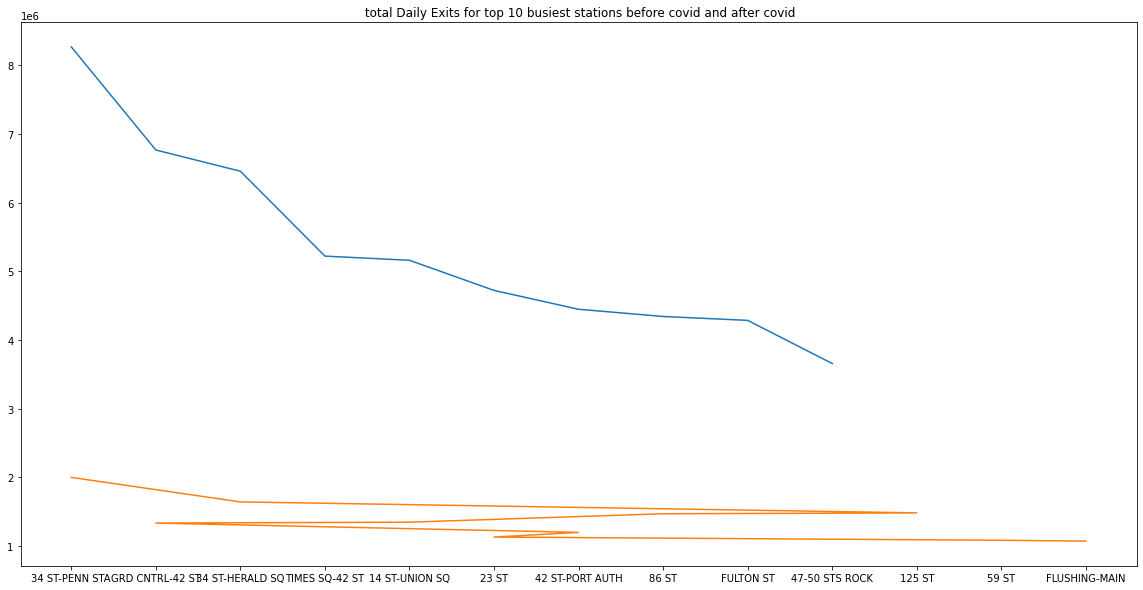

In [131]:
plt.figure(figsize=(20,10))
plt.plot(station_totals_before.iloc[0:10]['STATION'],station_totals_before.iloc[0:10]['DAILY_EXITS'],)
plt.plot(station_totals_after.iloc[0:10]['STATION'],station_totals_after.iloc[0:10]['DAILY_EXITS'])
plt.title(' total Daily Exits for top 10 busiest stations before covid and after covid')